# CIVL562 Environmental Data Collection and Analysis Course Materials
This notebook contains the code I run during lectures. If it gets unwieldy, I may split it into multiple notebooks. <br>
Created by Tim Rodgers, 2024-08-30.

## Intro
In this lecture, we will show some Python environmental data basics. <br>
First, we are working in a "jupyter notebook". Notebooks are a convenient way to organize a scripting workflow, although I find that they get unwieldy for more complicated workflows (e.g. making lots of functions or packages). They are also a good way to share coding in a way that can be understood by a reader. <br>
One important thing to remember is that code should be comprehensible - you want people to be able to follow your code and understand what you are doing. Using lots of comments is helpful for this! Jupyter runs code in "cells", and the cell that this is in is in markdown. Markdown cells are useful for writing longer comments, and they have formatting options like <pre><code> code command here </code></pre> that can help for things like tutorials.

In [4]:
#The first thing you want to do when running a Jupyter notebook is to import packages. I typically try to have a single import cell that I run 
#when I start or restart a cell.
#Numpy is a package for doing math, especially linear algebra. I have called it "np" for convenience
import numpy as np
#Pandas gives some more functionality to numpy, giving "dataframe" objects that act like R dataframes. 
import pandas as pd
#Matplotlib is Python's basic plotting package
import matplotlib.pyplot as plt
#Seaborn is a matplotlib wrapper which provides some pre-made figure types, and good formatting options. Similar to ggplot in R.
import seaborn as sns
#python debugger (pdb) is a basic python interactive debugger. I find it isn't perfect with Jupyter, but still nice to have 
import pdb
#statsmodels - added in lecture 2 - has a number of statistical functions. If it isn't installed just run conda install statsmodels
import statsmodels.api as sm
#import statsmodels as sm
#Added lecture 3 - more stats! 
#import pingouin as pg
#Added Lecture 12 - combinations
#from itertools import combinations
#Lecture 13 - Nonlinear regression
from scipy.optimize import curve_fit

In [139]:
#Now, lets load some data! I have saved an Excel spreadsheet with data from my 2023 paper that we can play with.
#we will import as a generic dataframe (df)
df = pd.read_excel('Data/lec1_timeseries_Pine8th.xlsx')
#df.head() gives the first 5 rows of the dataframe
df.head()

time  Qin  Qout_meas  RainRate  WindSpeed    RH  Tair  Twater  Tsubsoil  \
0 -24.0  0.0        0.0         0   1.388889  74.0  23.6    20.1      20.1   
1 -18.0  0.0        0.0         0   1.388889  74.0  23.6    20.1      20.1   
2 -12.0  0.0        0.0         0   1.388889  74.0  23.6    20.1      20.1   
3  -6.0  0.0        0.0         0   1.388889  74.0  23.6    20.1      20.1   
4  -3.5  0.0        0.0         0   1.388889  74.0  23.6    20.1      20.1   

   fvalveopen  ...  6PPD_Min  6PPDQ_Min  Rhodamine_Min  Benzotriazole_Min  \
0         0.0  ...         0        0.0            0.0                0.0   
1         0.0  ...         0        0.0            0.0                0.0   
2         0.0  ...         0        0.0            0.0                0.0   
3         0.0  ...         0        0.0            0.0                0.0   
4         0.0  ...         0        0.0            0.0                0.0   

   BPA_Min  Fipronil_Min  Bromide_Coutmeas  6PPDQ_Coutmeas  \
0      0.0           0.0               0.0             0.0   
1      0.0           0.0               0.0             0.0   
2      0.0           0.0               0.0             0.0   
3      0.0           0.0               0.0             0.0   
4      0.0           0.0               0.0             0.0   

   Rhodamine_Coutmeas  Notes  
0                 NaN    NaN  
1                 NaN    NaN  
2                 NaN    NaN  
3                 NaN    NaN  
4                 NaN    NaN  

[5 rows x 24 columns]

In [140]:
#To access data in a dataframe we use different kinds of indices. Lets build a "pltdata" df of bromide effluent concentrations
#df.loc[row,col] lets you access via the name of the column. Note that Python is case sensitive! a colon : is just everything/no selection
pltdata = df.loc[:,['time','Bromide_Coutmeas']]
#We can slice to get the positive numbers by doing a conditional index
pltdata = pltdata.loc[pltdata.time>=0,:]
pltdata.head()


time  Bromide_Coutmeas
244  0.000000               0.0
245  0.016667               0.0
246  0.033333               0.0
247  0.050000               0.0
248  0.066667               0.0

<Axes: xlabel='Bromide_Coutmeas', ylabel='Count'>

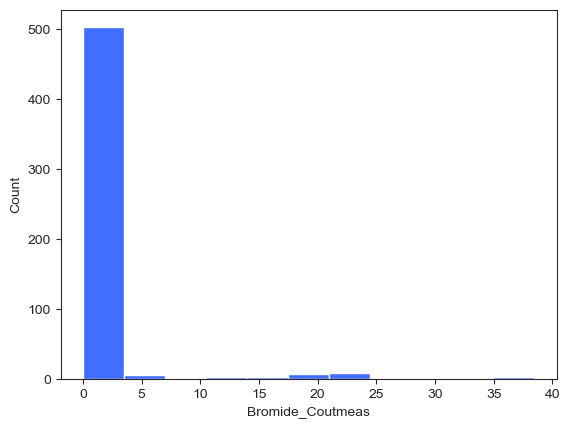

In [141]:
#Now we can do some plotting! 
#set_style lets you set different default plotting options
sns.set_style('ticks')
sns.set_palette('bright')
sns.histplot(data=pltdata, x='Bromide_Coutmeas')

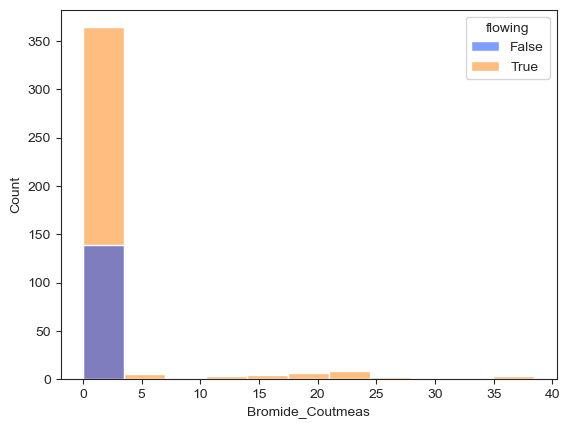

In [142]:
#We can see that mostly the data is zero - lots of time when nothing is flowing. Lets add a categorical variable to show flow
#To add a column to a dataframe, just use .loc with the new column name!
pltdata.loc[:,'Q_out'] = df.loc[df.time>=0,'Qout_meas']
pltdata.loc[:,'flowing'] = pltdata.Q_out>0
sns.histplot(data=pltdata, x='Bromide_Coutmeas',hue='flowing');


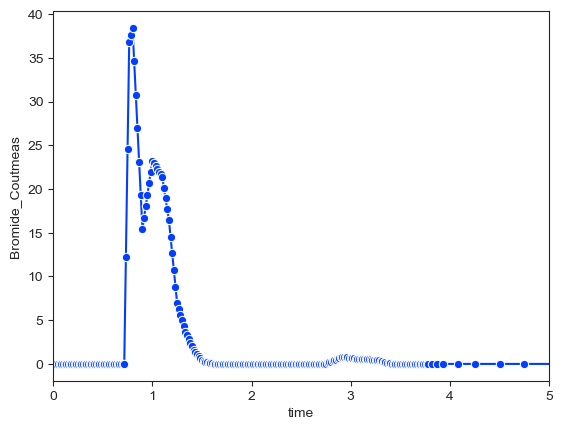

In [143]:
#Of course, we probably want to look at this as a time-series not a histogram!
#Truncating to 5 hours
ax = sns.lineplot(data=pltdata, x='time',y='Bromide_Coutmeas',marker='o');
ax.set_xlim([0,5]);

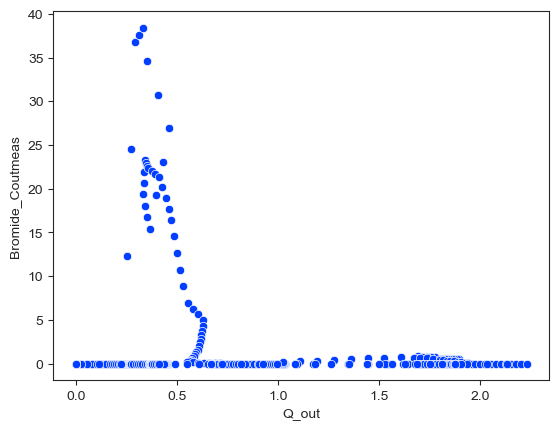

In [144]:
#Could also look at relationships with a scatterplot
#Is the bromide concentration highest with higher flows?
ax = sns.scatterplot(data=pltdata, x='Q_out',y='Bromide_Coutmeas',marker='o');
#ax.set_xlim([0,5]);

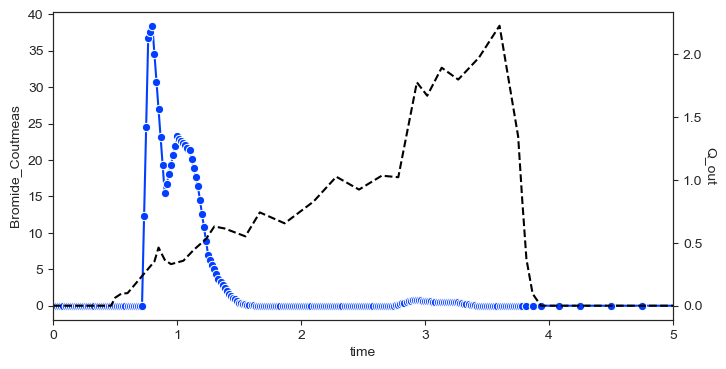

In [145]:
#Both of these are time varying so lets see what this looks like
#Truncating to 5 hours
fig,ax =plt.subplots(1,1,figsize=(8,4))
sns.lineplot(data=pltdata, x='time',y='Bromide_Coutmeas',marker='o',ax=ax);
#We can add the flow with matplotlib - slightly different syntax!
ax2 = ax.twinx()
ax2.plot(pltdata.time,pltdata.Q_out,color='k',linestyle='--')
ax2.set_ylabel('Q_out',rotation=270,labelpad=10)
ax.set_xlim([0,5]);

## Lecture 2: Data Quality
Dataset to fill in here: https://docs.google.com/spreadsheets/d/1VbGDFBnGlm9Qxm7R6FWsSNDWUMqsLOBPUI-xOH9DbFQ/edit?gid=0#gid=0

In [129]:
#First, we will import our typing speed dataset
tsdf = pd.read_csv('Data/lec2_typingspeed.csv')
tsdf

Person  Trial 1  Trial 2  Trial 3
0    Participant 1       57       60       61
1    Participant 2       87      102       84
2    Participant 3       49       54       62
3    Participant 4       26       30       29
4    Participant 5       31       35       34
5    Participant 6       65       70       65
6    Participant 7       39       46       41
7    Participant 8       68       68       65
8    Participant 9       82       73       74
9   Participant 11       44       57       69
10  Participant 13       55       56       54
11  Participant 14       27       27       30
12  Participant 16       30       40       31

In [147]:
#First, lets calculate the average and standard deviation for each person
tsdf.loc[:,'mean'] = tsdf.loc[:,'Trial 1':'Trial 3'].mean(axis=1)
tsdf.loc[:,'median'] = tsdf.loc[:,'Trial 1':'Trial 3'].median(axis=1)
#Pandas calculates the sample standard deviation ()
tsdf.loc[:,'sd_sample'] = tsdf.loc[:,'Trial 1':'Trial 3'].std(axis=1)
tsdf.loc[:,'sd_pop'] = tsdf.loc[:,'Trial 1':'Trial 3'].std(axis=1,ddof=0)
tsdf.loc[:,['Person','mean','median','sd_sample','sd_pop']]

Person       mean  median  sd_sample     sd_pop
0    Participant 1  59.333333    60.0   2.081666   1.699673
1    Participant 2  91.000000    87.0   9.643651   7.874008
2    Participant 3  55.000000    54.0   6.557439   5.354126
3    Participant 4  28.333333    29.0   2.081666   1.699673
4    Participant 5  33.333333    34.0   2.081666   1.699673
5    Participant 6  66.666667    65.0   2.886751   2.357023
6    Participant 7  42.000000    41.0   3.605551   2.943920
7    Participant 8  67.000000    68.0   1.732051   1.414214
8    Participant 9  76.333333    74.0   4.932883   4.027682
9   Participant 11  56.666667    57.0  12.503333  10.208929
10  Participant 13  55.000000    55.0   1.000000   0.816497
11  Participant 14  28.000000    27.0   1.732051   1.414214
12  Participant 16  33.666667    31.0   5.507571   4.496913

In [ ]:
#tsdf
ndf

In [148]:
#We can also look at the class mean across trials
tdf = pd.DataFrame(tsdf.loc[:,'Trial 1':'Trial 3'].mean(axis=0),columns=['Mean']) #Note capital here as "mean" is already a pandas method
tdf.loc[:,'median'] = tsdf.loc[:,'Trial 1':'Trial 3'].median(axis=0)
tdf.loc[:,'sd_sample'] = tsdf.loc[:,'Trial 1':'Trial 3'].std(axis=0)
tdf.loc[:,'n'] = tsdf.loc[:,'Trial 1':'Trial 3'].count(axis=0)
#And in total
print('Total Mean')
print(tsdf.loc[:,'Trial 1':'Trial 3'].mean(axis=0).mean())
tdf

Total Mean
53.256410256410255


Mean  median  sd_sample   n
Trial 1  50.769231    49.0  20.478256  13
Trial 2  55.230769    56.0  20.559482  13
Trial 3  53.769231    61.0  18.659912  13

In [133]:
#Confidence Interval - did people get better? lets see how different the 95% confidence intervals are 
import scipy.stats
#First, we can do this manually
alpha = 0.05
tdf.loc[:,'2_5'] = tdf.Mean - tdf.sd_sample/np.sqrt(tdf.n) * scipy.stats.t.ppf((1 + (1-alpha)) / 2., tdf.n-1)
tdf.loc[:,'97_5'] = tdf.Mean + tdf.sd_sample/np.sqrt(tdf.n) * scipy.stats.t.ppf((1 + (1-alpha)) / 2., tdf.n-1)
tdf

Mean  sd_sample   n        2_5       97_5
Trial 1  50.769231  20.478256  13  38.394344  63.144117
Trial 2  55.230769  20.559482  13  42.806798  67.654740
Trial 3  53.769231  18.659912  13  42.493159  65.045303

In [134]:
#Or, calculate directly with scipy
scipy.stats.t.interval((1-alpha),tdf.n-1,loc=tdf.Mean,scale=tdf.sd_sample/np.sqrt(tdf.n))

(array([38.39434444, 42.80679849, 42.49315893]),
 array([63.1441171 , 67.65473997, 65.04530261]))

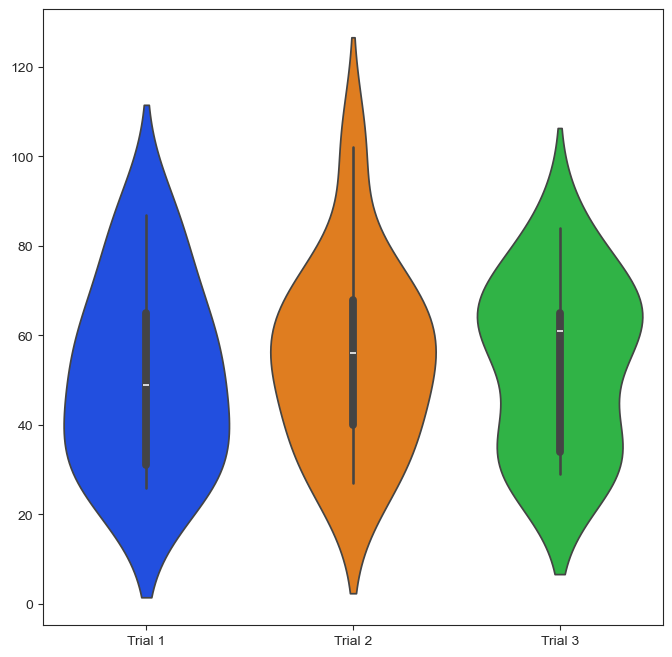

In [135]:
fig,ax = plt.subplots(figsize=(8,8))
sns.violinplot(data=tsdf.loc[:,'Trial 1':'Trial 3'],ax=ax);

In [137]:
#Lets calculate the confidence interval of the variance!
#Lets get chatGPT to help:
def confidence_interval_variance(data_column, confidence_level=0.95):
    #Made with the help of ChatGPT
    # Number of observations
    n = len(data_column)
    
    # Sample variance
    sample_variance = np.var(data_column, ddof=1)
    
    # Degrees of freedom
    df = n - 1
    
    # Confidence level alpha
    alpha = 1 - confidence_level
    
    # Chi-square critical values
    chi2_lower = scipy.stats.chi2.ppf(alpha / 2, df)
    chi2_upper = scipy.stats.chi2.ppf(1 - alpha / 2, df)
    
    # Confidence interval for the variance
    lower_bound = (df * sample_variance) / chi2_upper
    upper_bound = (df * sample_variance) / chi2_lower
    
    return lower_bound, upper_bound

In [138]:
confidence_interval_variance(tsdf.loc[:,'Trial 1':'Trial 3'],confidence_level=1-alpha)

C:\Users\Timot\.conda\envs\562env\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


(Trial 1    215.639547
 Trial 2    217.353588
 Trial 3    179.044771
 dtype: float64,
 Trial 1    1142.722382
 Trial 2    1151.805470
 Trial 3     948.798446
 dtype: float64)

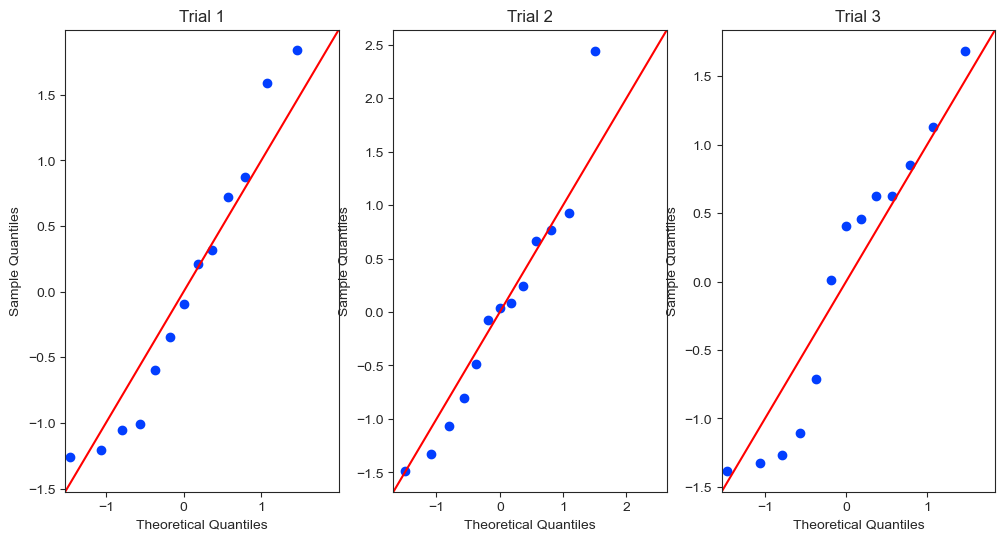

In [162]:
import statsmodels.api as sm
#New package - if you haven't installed it, go to your command prompt and type in conda insall statsmodels
import scipy.stats as stats
#Recap - Testing Normality
fig,ax = plt.subplots(1,3,figsize=(12,6))
for ind,trial in enumerate(['Trial 1','Trial 2','Trial 3']):
    sm.qqplot(tsdf.loc[:,trial],stats.t,ax=ax[ind],fit=True, line="45")
    ax[ind].set_title(trial)

## Lecture 3: Sampling and Experimental Design

In [211]:
#Import data
nwdf = pd.read_csv('Data/lec3_needlewash_factorial.csv')
nwdf.loc[:,['Solvent','6PPD_Carryover 1','6PPD-Q_Carryover 1']].groupby('Solvent').mean()


6PPD_Carryover 1  6PPD-Q_Carryover 1
Solvent                                      
IPA              0.001021            0.001374
MM               0.001998            0.010646
MeOH             0.003235            0.001867

In [205]:
#nwdf.loc[:,['Solvent','6PPD_Carryover 1','6PPD-Q_Carryover 1']].groupby('Solvent').mean()
nwdf.loc[:,['Run Date','6PPD_Carryover 1','6PPD-Q_Carryover 1']].groupby('Run Date').mean()

6PPD_Carryover 1  6PPD-Q_Carryover 1
Run Date                                       
24-Aug-22          0.004402            0.000091
24-Sep-10          0.000000            0.008282
Duplicate          0.001649            0.011974

In [203]:
pltdata = nwdf#.loc[nwdf.loc[:,'Run Date'] !='Duplicate',:]
model = pg.anova(dv='6PPD_Carryover 1',between=['Solvent','Time.1','Wash Type'], data=pltdata, detailed=True,effsize='n2')
#model = pg.anova(dv='6PPD_Carryover 1',between=['Solvent','Time.1','Wash Type'], data=nwdf, detailed=True,effsize='n2',ss_type=3)
#model = pg.anova(dv='6PPD_Carryover 1',between=['Run Date'], data=nwdf, detailed=True,effsize='n2',ss_type=3)
model

C:\Users\Timot\.conda\envs\562env\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


Source            SS   DF            MS         F  \
0                       Solvent  2.682744e-06  2.0  1.341372e-06  0.474614   
1                        Time.1  7.560375e-07  1.0  7.560375e-07  0.267506   
2                     Wash Type  1.489884e-05  1.0  1.489884e-05  5.271613   
3              Solvent * Time.1  2.812542e-05  2.0  1.406271e-05  4.975767   
4           Solvent * Wash Type  1.398262e-05  2.0  6.991310e-06  2.473714   
5            Time.1 * Wash Type  1.341372e-06  1.0  1.341372e-06  0.474614   
6  Solvent * Time.1 * Wash Type  3.764563e-05  2.0  1.882282e-05  6.660021   
7                      Residual  5.652480e-06  2.0  2.826240e-06       NaN   

      p-unc        n2  
0  0.562058  0.025529  
1  0.656527  0.007195  
2  0.148555  0.141779  
3  0.167343  0.267644  
4  0.287876  0.133060  
5  0.562058  0.012765  
6  0.130548  0.358239  
7       NaN       NaN

In [210]:
pltdata = nwdf#.loc[nwdf.loc[:,'Run Date'] !='Duplicate',:]
model = pg.anova(dv='6PPD_Carryover 1',between=['Run Date'], data=pltdata, detailed=True,effsize='n2')
model

Source       SS  DF        MS       F     p-unc        n2
0  Run Date  0.00003   2  0.000015  7.4246  0.031847  0.748101
1    Within  0.00001   5  0.000002     NaN       NaN       NaN

## Lecture 6: Selectivity and Sensitivity

In [46]:
sensdf = pd.read_csv('Data/lec6_waggdl_outputs.csv',na_values=['N/F']).fillna(0)
sensdf

Sample Volume (mL)                  Sample BTA-d4 Recovery (%)  \
0                    1                CC1_0_05         0.745825511   
1                    1                 CC2_0_1         0.911912118   
2                    1                 CC3_0_5         0.941539212   
3                    1                 CC4_1_0         0.963713161   
4                    1                 CC5_2_0          0.99361067   
5                    1                 CC6_5_0         0.993352069   
6                    1                CC7_10_0         1.058042655   
7                    1                CC8_20_0         1.137830116   
8                    1                MeOHBLK3             #VALUE!   
9                    1              MeOHBLK3_1             #VALUE!   
10                   1                MeOHBLK4             #VALUE!   
11                   1              MeOHBLK4_1             #VALUE!   
12                  25           14082024_BLK1         0.986869341   
13                  25            DLG18-19_1-2         0.997917892   
14                  25            DLG18-19_1-1         1.001543003   
15                  25              DLG5-6_1-2         1.051296853   
16                  25              DLG5-6_1-1         0.998415268   
17                  25           14082024_BLK2         1.034489947   
18                  25                MeOHBLK5             #VALUE!   
19                   1                 QC1_1_0         1.046385595   
20                  25                MeOHBLK6             #VALUE!   
21                  25             BolSurfSed1         1.165468079   
22                  25             BolSurfSed2         1.044598941   
23                  25           BolSurfSed3-2         1.125150689   
24                  25           BolSurfSed3-1         1.048529759   
25                  25  BolSurfSed_BLK1_150824         0.996581619   
26                  25             BolSurfSed4         1.034040833   
27                  25             BolSurfSed5         1.043397055   
28                  25            BolSurfSed6a         0.913762202   
29                  25          BolSurfSed6B-2         0.981096899   
30                  25          BolSurfSed6B-1         1.101718095   
31                  25            BolSurfSed6C         0.954389399   
32                  25  BolSurfSed_BLK2_160824         1.032634012   
33                  25                MeOHBLK7             #VALUE!   
34                  25                MeOHBLK8             #VALUE!   
35                   1               QC2_1_0_A                   0   
36                  10                 OldBol1         0.943185219   
37                  10                OldBol_2         0.977686292   
38                  10                 OldBol3         0.564101409   
39                  10                 OldBol4         1.051462871   
40                  10                 OldBol5         0.605727384   
41                  10                OldBol6a         0.710033643   
42                  10                OldBol6b         0.778551974   
43                  10                OldBol6c          1.12185964   
44                  10                 OldBol7         0.856760814   
45                  10        OldBolBlk_030724         1.042271709   

    BTA (ug/L) 6PPDQ-d5 Recovery (%)  6PPDQ (ug/L)  6PPD (ug/L)  \
0        0.125           0.993905282         0.067        0.000   
1        0.125            1.26165315         0.091        0.410   
2        0.522           0.953869793         0.289        0.582   
3        0.966           0.947293037         1.046        0.933   
4        1.910           0.933762205         2.120        1.953   
5        5.022           0.941433149         5.401        4.628   
6       10.659           0.978045615        10.277        9.634   
7       19.675            0.98394305        19.359       20.770   
8        0.000            0.00248358        14.545      117.983   
9        0.000               #VALUE!       

In [47]:
#now, make a dataframe with just the means
blkdf = sensdf[((sensdf.Sample.str.contains('BLK')) & (~sensdf.Sample.str.contains('OH')))]
blkdf

Sample Volume (mL)                  Sample BTA-d4 Recovery (%)  \
12                  25           14082024_BLK1         0.986869341   
17                  25           14082024_BLK2         1.034489947   
25                  25  BolSurfSed_BLK1_150824         0.996581619   
32                  25  BolSurfSed_BLK2_160824         1.032634012   

    BTA (ug/L) 6PPDQ-d5 Recovery (%)  6PPDQ (ug/L)  6PPD (ug/L)  \
12         0.0           0.852113232         0.000        0.000   
17         0.0           0.748831542         0.000        1.266   
25         0.0           0.859660904         0.000        4.526   
32         0.0           0.819226749         0.012        8.541   

   MBT D4 Recovery (%)  MBT  HMMM Fipronil IS Recovery (%)  Fipronil  
12         0.769740665  0.0   0.0              1.041984183       0.0  
17         0.538566213  0.0   0.0              0.989790054       0.0  
25         0.393259103  0.0   0.0              1.241480634       0.0  
32         0.540628968  0.0   0.0              0.882417617       0.0

In [208]:
#blkdf

In [209]:
#Calculate the MDL = av(blk) + 3*sd
blkdf = sensdf[((sensdf.Sample.str.upper().str.contains('BLK')) & (~sensdf.Sample.str.upper().str.contains('OH')))]
cols=['BTA (ug/L)','6PPDQ (ug/L)','6PPD (ug/L)','MBT','HMMM','Fipronil']
MDLs=pd.DataFrame(blkdf.loc[:,cols].mean()+3*blkdf.loc[:,cols].std(),columns = ['MDL'])
MDLs

MDL
BTA (ug/L)     0.000000
6PPDQ (ug/L)   0.024518
6PPD (ug/L)   16.577513
MBT            0.000000
HMMM           0.000000
Fipronil       0.000000

In [110]:
#For compounds with nothing in the blank, we will set MDL = lowest calibration standard used
MDLs.loc['BTA (ug/L)','MDL'] = 0.1
MDLs.loc['6PPDQ (ug/L)','MDL'] = max(MDLs.loc['6PPDQ (ug/L)','MDL'],0.05)
MDLs.loc['6PPD (ug/L)','MDL']= max(MDLs.loc['6PPD (ug/L)','MDL'],0.1)
MDLs.loc['MBT','MDL'] = 0.1
MDLs.loc['HMMM','MDL'] = 0.05
MDLs.loc['Fipronil','MDL'] = 0.05
MDLs

MDL
BTA (ug/L)     0.100000
6PPDQ (ug/L)   0.050000
6PPD (ug/L)   16.577513
MBT            0.100000
HMMM           0.050000
Fipronil       0.050000

In [93]:
smpldf

Sample Volume (mL)          Sample BTA-d4 Recovery (%)  BTA (ug/L)  \
13                  25    DLG18-19_1-2         0.997917892       0.000   
14                  25    DLG18-19_1-1         1.001543003       0.000   
15                  25      DLG5-6_1-2         1.051296853       0.000   
16                  25      DLG5-6_1-1         0.998415268       0.000   
21                  25     BolSurfSed1         1.165468079       0.147   
22                  25     BolSurfSed2         1.044598941       0.243   
23                  25   BolSurfSed3-2         1.125150689       4.274   
24                  25   BolSurfSed3-1         1.048529759      12.880   
26                  25     BolSurfSed4         1.034040833       2.032   
27                  25     BolSurfSed5         1.043397055       1.554   
28                  25    BolSurfSed6a         0.913762202       1.457   
29                  25  BolSurfSed6B-2         0.981096899       0.197   
30                  25  BolSurfSed6B-1         1.101718095       0.247   
31                  25    BolSurfSed6C         0.954389399       1.062   
36                  10         OldBol1         0.943185219       0.261   
37                  10        OldBol_2         0.977686292       0.302   
38                  10         OldBol3         0.564101409       1.015   
39                  10         OldBol4         1.051462871       0.329   
40                  10         OldBol5         0.605727384       0.691   
41                  10        OldBol6a         0.710033643       0.419   
42                  10        OldBol6b         0.778551974       0.353   
43                  10        OldBol6c          1.12185964       0.475   
44                  10         OldBol7         0.856760814       0.212   

   6PPDQ-d5 Recovery (%)  6PPDQ (ug/L)  6PPD (ug/L) MBT D4 Recovery (%)  \
13           0.801248733         0.153        7.403         0.175784302   
14           0.767854157         0.242       10.424         0.194899424   
15           0.800175612         0.080        7.708         0.199278136   
16           0.825738754         0.062        7.035         0.185333083   
21            0.75215531         1.392       73.627         0.061185678   
22           0.798990128         1.475       77.033         0.027567484   
23           0.786414986         1.166       33.020         0.024123909   
24           0.713690975         1.184       41.425         0.030229279   
26           0.771315356         0.743       59.669         0.116075754   
27           0.753065163         0.700       33.406         0.058909209   
28           0.809663028         1.601       81.781         0.056997403   
29            0.71579821         2.134      124.010          0.06031451   
30           0.749512103         2.743      140.918         0.027565871   
31           0.821702245         1.121       65.584          0.01299111   
36           0.879036484         1.825       96.442         0.035624573   
37           1.009148841         2.108      220.005         0.041433046   
38           0.640365887         1.176      120.642         0.023843193   
39           1.330401505         0.580       37.967         0.143298101   
40           0.767160121         0.762       43.416         0.027998461   
41              0.761492         0.841       90.134         0.046119775   
42           0.662149681         4.505      449.499             #VALUE!   
43           1.063863654         1.388       90.417          0.00954981   
44           0.785388198         1.092       76.712         0.008504763   

       MBT   HMMM Fipronil IS Recovery (%)  Fipronil  
13   0.000  0.000              1.120913212       0.0  
14   0.436  0.000              0.834425454       0.0  
15   0.000  0.000              0.947735394       0.0  
16   0.000  0.000              1.103325291       0.0  
21   7.929  0.060              1.001189034       0.0  
22  11.372  0.000                1.1035651       0.0  
23   6.631  0.000              1.10074860

In [138]:
from scipy.stats import gmean
#lets test some substitutions. First, no substitution
#For summary stats, need to only consider samples
smpldf = sensdf[((sensdf.Sample.str.upper().str.contains('DLG')) | (sensdf.Sample.str.upper().str.contains('BOL')) 
                 & (~sensdf.Sample.str.upper().str.contains('BLK')))]
subdf = pd.DataFrame(smpldf.loc[:,cols].apply(gmean),columns=['NoSub'])
#Now lets just remove everything below the MDL
df1 = smpldf.loc[:,cols]
for col in cols:
    df1.loc[df1.loc[:,col]<MDLs.loc[col,'MDL'],col] = np.nan
subdf.loc[:,'Drop<MDL'] = df1.loc[:,cols].apply(lambda row: gmean(row[~row.isna()]), axis=0)
#subdf.loc[:,'Drop<MDL'] = np.exp(np.log(df1.prod(axis=1))/df1.notna().sum(1))
#Now we will replace with MDL/sqrt(2)
df2 = smpldf.loc[:,cols]
for col in cols:
    df2.loc[df2.loc[:,col]<MDLs.loc[col,'MDL'],col] = MDLs.loc[col,'MDL']/np.sqrt(2)
subdf.loc[:,'MDL/sqrt2'] = df2.loc[:,cols].apply(gmean)
subdf

C:\Users\Timot\.conda\envs\562env\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\Timot\.conda\envs\562env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


NoSub   Drop<MDL  MDL/sqrt2
BTA (ug/L)     0.000000   0.623554   0.427030
6PPDQ (ug/L)   0.861770   0.861770   0.861770
6PPD (ug/L)   54.063699  80.744875  57.724025
MBT            0.000000   6.326900   2.895769
HMMM           0.000000   0.096849   0.045986
Fipronil       0.000000        NaN   0.035355

In [206]:
#np.array(clambdf.loc[:,'0.01000':])
x = clambdf['gamma/h']
y = pd.to_numeric(clambdf.loc[:,'0.01000':].columns)
interp = RegularGridInterpolator((x, y), np.array(clambdf.loc[:,'0.01000':]))
pts = list(zip(mledf.h, mledf.yc))
#interp(pts)
pts
#np.array([mledf.loc[:,'h'],mledf.loc[:,'yc']])
#pts

[(0.17391304347826086, -2.3025850929940455),
 (0.0, -2.995732273553991),
 (0.17391304347826086, 2.8080471187660065),
 (0.17391304347826086, -2.3025850929940455),
 (0.7391304347826086, -2.995732273553991),
 (1.0, -2.995732273553991)]

In [201]:
from scipy.interpolate import RegularGridInterpolator
clambdf = pd.read_csv('Data/lec6_cohenlambda.csv')

#np.interp(mle.gamma,mle['gamma/h'])
#clambdf.reset_index(axis=1)#.info()

In [168]:
#Now, lets try Cohen's maximum likelhihood estimator. For simplicity, assume lognormal
clambdf = pd.read_csv('Data/lec6_cohenlambda.csv')
lnsmpldf = np.log(df1.loc[:,cols]) #Using df1 as it has nans for the censored data
#col = 'MBT'
mledf = pd.DataFrame(lnsmpldf.notna().sum(),columns=['k'])
mledf.loc[:,'n'] = len(lnsmpldf)
mledf.loc[:,'ybar'] = lnsmpldf.mean()
mledf.loc[:,'sd2'] = lnsmpldf.std(ddof=0)**2
mledf.loc[:,'h'] = (mledf.n-mledf.k)/mledf.n
mledf.loc[:,'yc'] = np.log(MDLs.loc[:,'MDL'])
mledf.loc[:,'gamma'] = mledf.sd2/(mledf.ybar-mledf.yc)
#We are just going to grab lambda from the table (Cohen, 1961)
#x = clambdf['gamma/h']
y = pd.to_numeric(clambdf.loc[:,'0.01000':].columns)
interp = RegularGridInterpolator((x, y), np.array(clambdf.loc[:,'0.01000':]))
mledf.loc[:,'lamb'] = [0.2355,1,0.19910,0.190,1.713,0]
#finally, here is our estimate of mean
mledf.loc[:,'eta'] = np.exp(mledf.ybar - mledf.lamb*(mledf.ybar-mledf.yc))
mledf

k   n      ybar       sd2         h        yc     gamma  \
BTA (ug/L)    19  23 -0.472321  1.312053  0.173913 -2.302585  0.716866   
6PPDQ (ug/L)  23  23 -0.148767  1.096545  0.000000 -2.995732  0.385163   
6PPD (ug/L)   19  23  4.391294  0.410037  0.173913  2.808047  0.258984   
MBT           19  23  1.844810  0.725823  0.173913 -2.302585  0.175007   
HMMM           6  23 -2.334601  0.208214  0.739130 -2.995732  0.314936   
Fipronil       0  23       NaN       NaN  1.000000 -2.995732       NaN   

                lamb        eta  
BTA (ug/L)    0.2355   0.405211  
6PPDQ (ug/L)  1.0000   0.050000  
6PPD (ug/L)   0.1991  58.913481  
MBT           0.1900   2.877164  
HMMM          1.7130   0.031207  
Fipronil      0.0000        NaN

## Lecture 8  - Hypothesis testing

In [2]:
compdf = pd.read_excel('Data/lec8_hypothesis_data.xlsx',sheet_name=0) 
stabdf = pd.read_excel('Data/lec8_hypothesis_data.xlsx',sheet_name=1)


<Axes: xlabel='Type', ylabel='C6PPDQ_ng_L'>

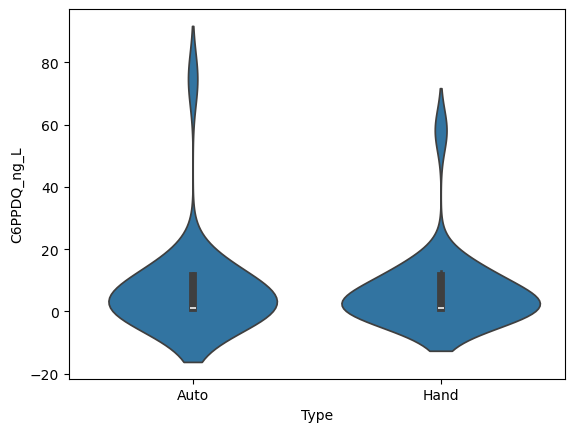

In [3]:
sns.violinplot(data=compdf,x='Type',y='C6PPDQ_ng_L')

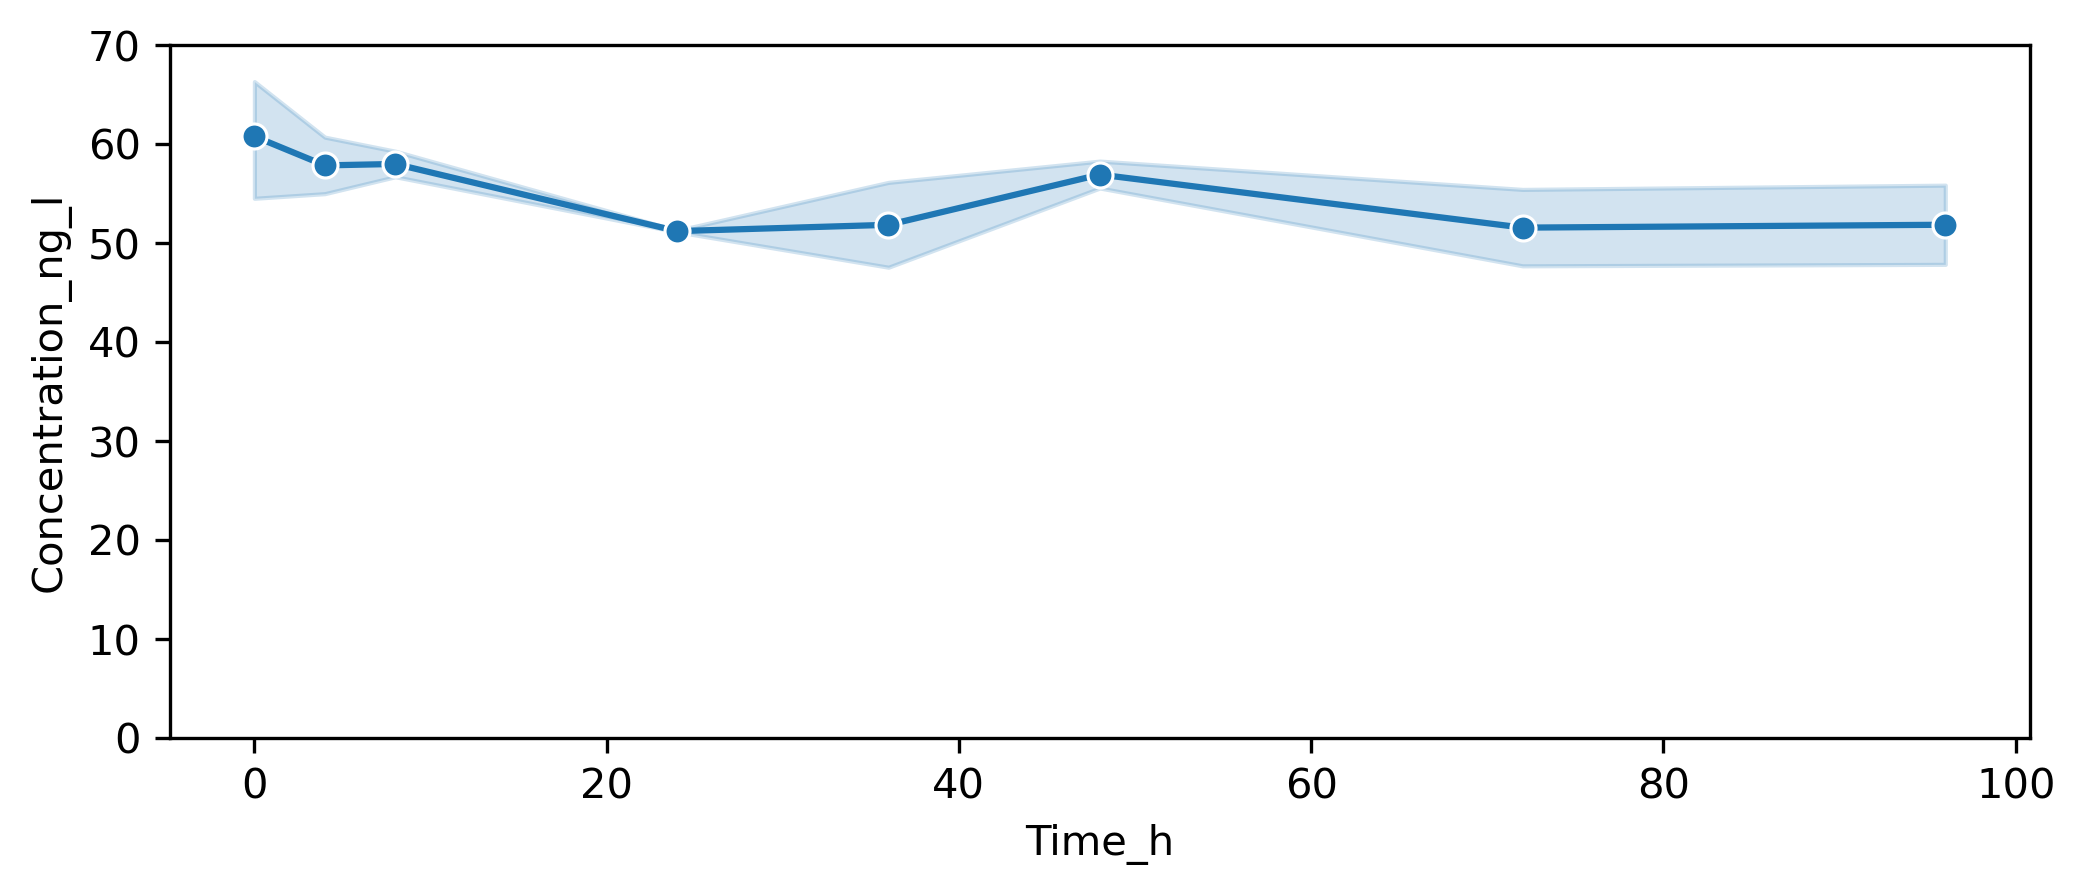

In [4]:
pltdf = stabdf[~pd.isna(stabdf.Time_h)]
fig,ax = plt.subplots(figsize=(8,3),dpi=300)
sns.lineplot(data=pltdf,x='Time_h',y='Concentration_ng_l',marker='o')
ax.set_ylim(0,70);

# Lecture 12 - Nonlinear and multiple regression

In [54]:
#Import data (from Rodgers et al. (2023)) #pd.read_excel('Data/lec8_hypothesis_data.xlsx',sheet_name=0)
fpath = 'Data/'
resdfname = 'lec12_resdf_15k_seasonal.pkl'# 
resdf = pd.read_pickle(fpath+resdfname)
try:
    resdf.drop(index='Average',inplace=True)
except KeyError:
    pass
predf = pd.read_csv(fpath+"lec12_LocationData_15km.csv",index_col=0,encoding = "ISO-8859-1")
#'''
varlist = ['Landcoverpct_built_up','GDPtotalPPP_2015_sum','GDPperCapitaPPP_2015_mean',
           'WorldPop_2018_sum','TavC_mean','National_ManufacturingpctGDP_2018',
           'Landcover_veg_total','Landcoverpct_bare_sparse_vegetation',
           'windspeed_ms_mean','Precip_mmhr_mean','PBL_height_m_mean','RH_mean',
           'EDGAR_TOTCO2_kgm2s',
           'EDGAR_CO2_Aviation_pct','EDGAR_CO2_Agriculture_pct','EDGAR_CO2_Chemical_processes_pct',
             'EDGAR_CO2_Power_industry_pct','EDGAR_CO2_Combustion_for_manufacturing_pct',
             'EDGAR_CO2_Iron_and_steel_production_pct','EDGAR_CO2_Non_energy_use_of_fuels_pct',
             'EDGAR_CO2_Non-ferrous_metals_production_pct','EDGAR_CO2_Non-metallic_minerals_production_pct',
             'EDGAR_CO2_Fuel_Exploitation_pct','EDGAR_CO2_Solvents_and_products_use_pct',
             'EDGAR_CO2_Energy_for_buildings_pct','EDGAR_CO2_Oil_refineries_and_Transformation_industry_pct',
             'EDGAR_CO2_Solid_waste_incineration_pct','EDGAR_CO2_Railways_pipelines_offroad_pct','EDGAR_CO2_Shipping_pct',
             'EDGAR_CO2_Road_transportation_pct']
predf2 = predf.loc[:,varlist].reindex(index=resdf.index,level=0)
for cty in predf2.index.levels[0]:#[:-1]
    predf2.loc[(cty,slice(None)),varlist]= np.array(predf.loc[cty,varlist])
    #locsumm = pd.read_excel('Many_Mums/locsumms_admin.xlsx',sheet_name=cty,index_col = 0) 
    locsumm = pd.read_excel('Data/lec12_locsumms_15k.xlsx',sheet_name=cty,index_col = 0) 
    resdf.loc[(cty,slice(None)),'Awat'] = locsumm.loc['Water','Area']
    resdf.loc[(cty,slice(None)),'Aveg'] = locsumm.loc['Vegetation','Area']
    resdf.loc[(cty,slice(None)),'Afilm'] = locsumm.loc['Film','Area']
    resdf.loc[(cty,slice(None)),'Ala'] = locsumm.loc['Lower_Air','Area']

resdf = pd.concat([resdf,predf2],axis=1)

resdf.head()
resdf.loc[:,'City'] = resdf.index.get_level_values(level=0)
resdf.loc[:,'Chem'] = resdf.index.get_level_values(level=1)
resdf.loc[:,'emiss_kgyr'] = pd.to_numeric(resdf.loc[:,'emiss_kgyr']).values
#resdf.loc[:,'emissflux_kgm2y'] = pd.to_numeric(resdf.loc[:,'emissflux_kgm2y']).values
resdf.loc[:,'emissflux_kgm2y'] = pd.to_numeric(resdf.loc[:,'emiss_kgyr']/resdf.loc[:,'Ala'])
resdf.loc[:,'logemissflux'] = np.log10(pd.to_numeric(resdf.loc[:,'emiss_kgyr']/resdf.loc[:,'Ala']))
resdf.loc[:,'logemiss'] = np.log10(pd.to_numeric(resdf.loc[:,'emiss_kgyr']))
resdf.loc[:,'emiss_percapita'] = resdf.loc[:,'emiss_kgyr']/resdf.WorldPop_2018_sum

In [52]:
#resdf = resdf.loc[resdf.loc[:,'emissflux_kgm2y']!=0,:]

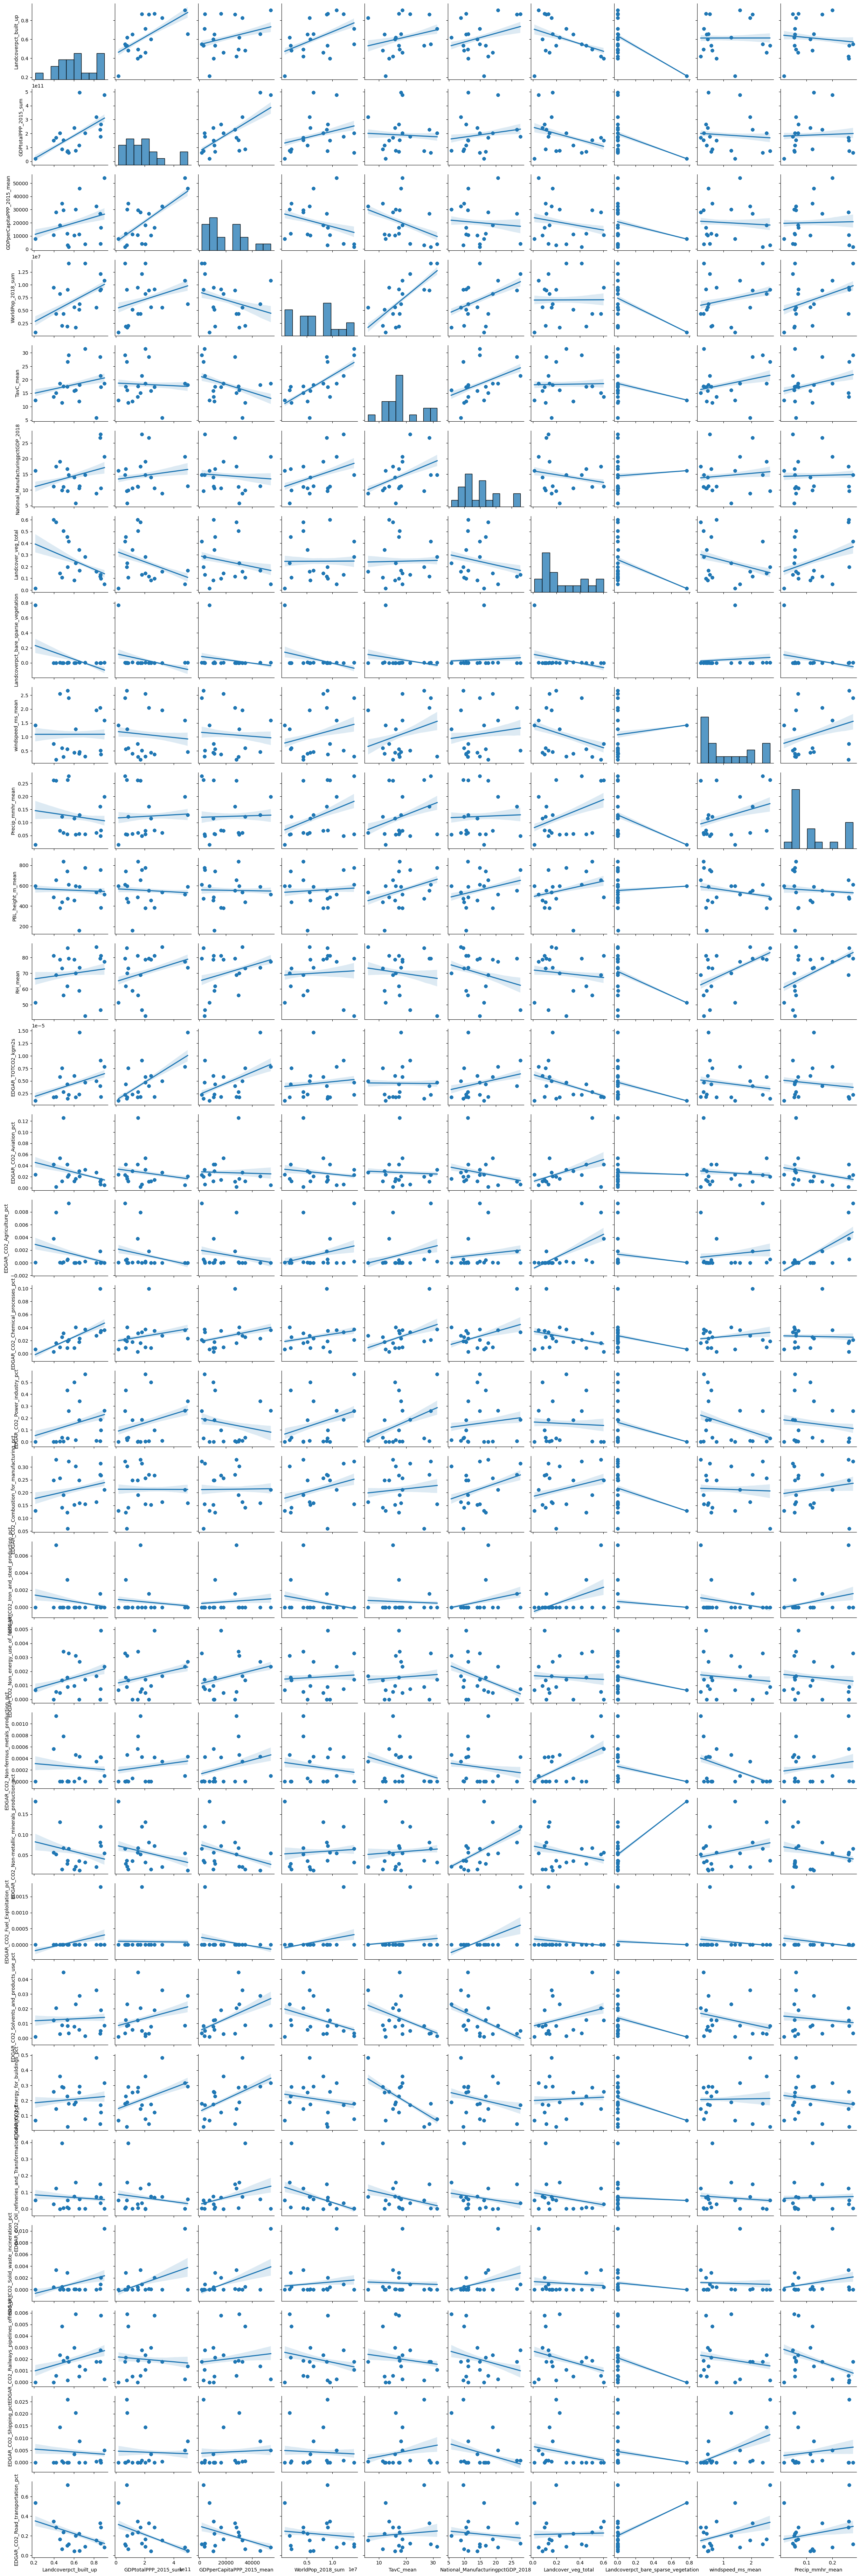

In [55]:
#First, lets look at the co-linearity of our data:
#Warning - very slow!
len(varlist)
g = sns.pairplot(resdf.loc[(slice(None),slice(None)),:],x_vars=varlist[:int((len(varlist))/3)],y_vars= varlist,kind="reg")

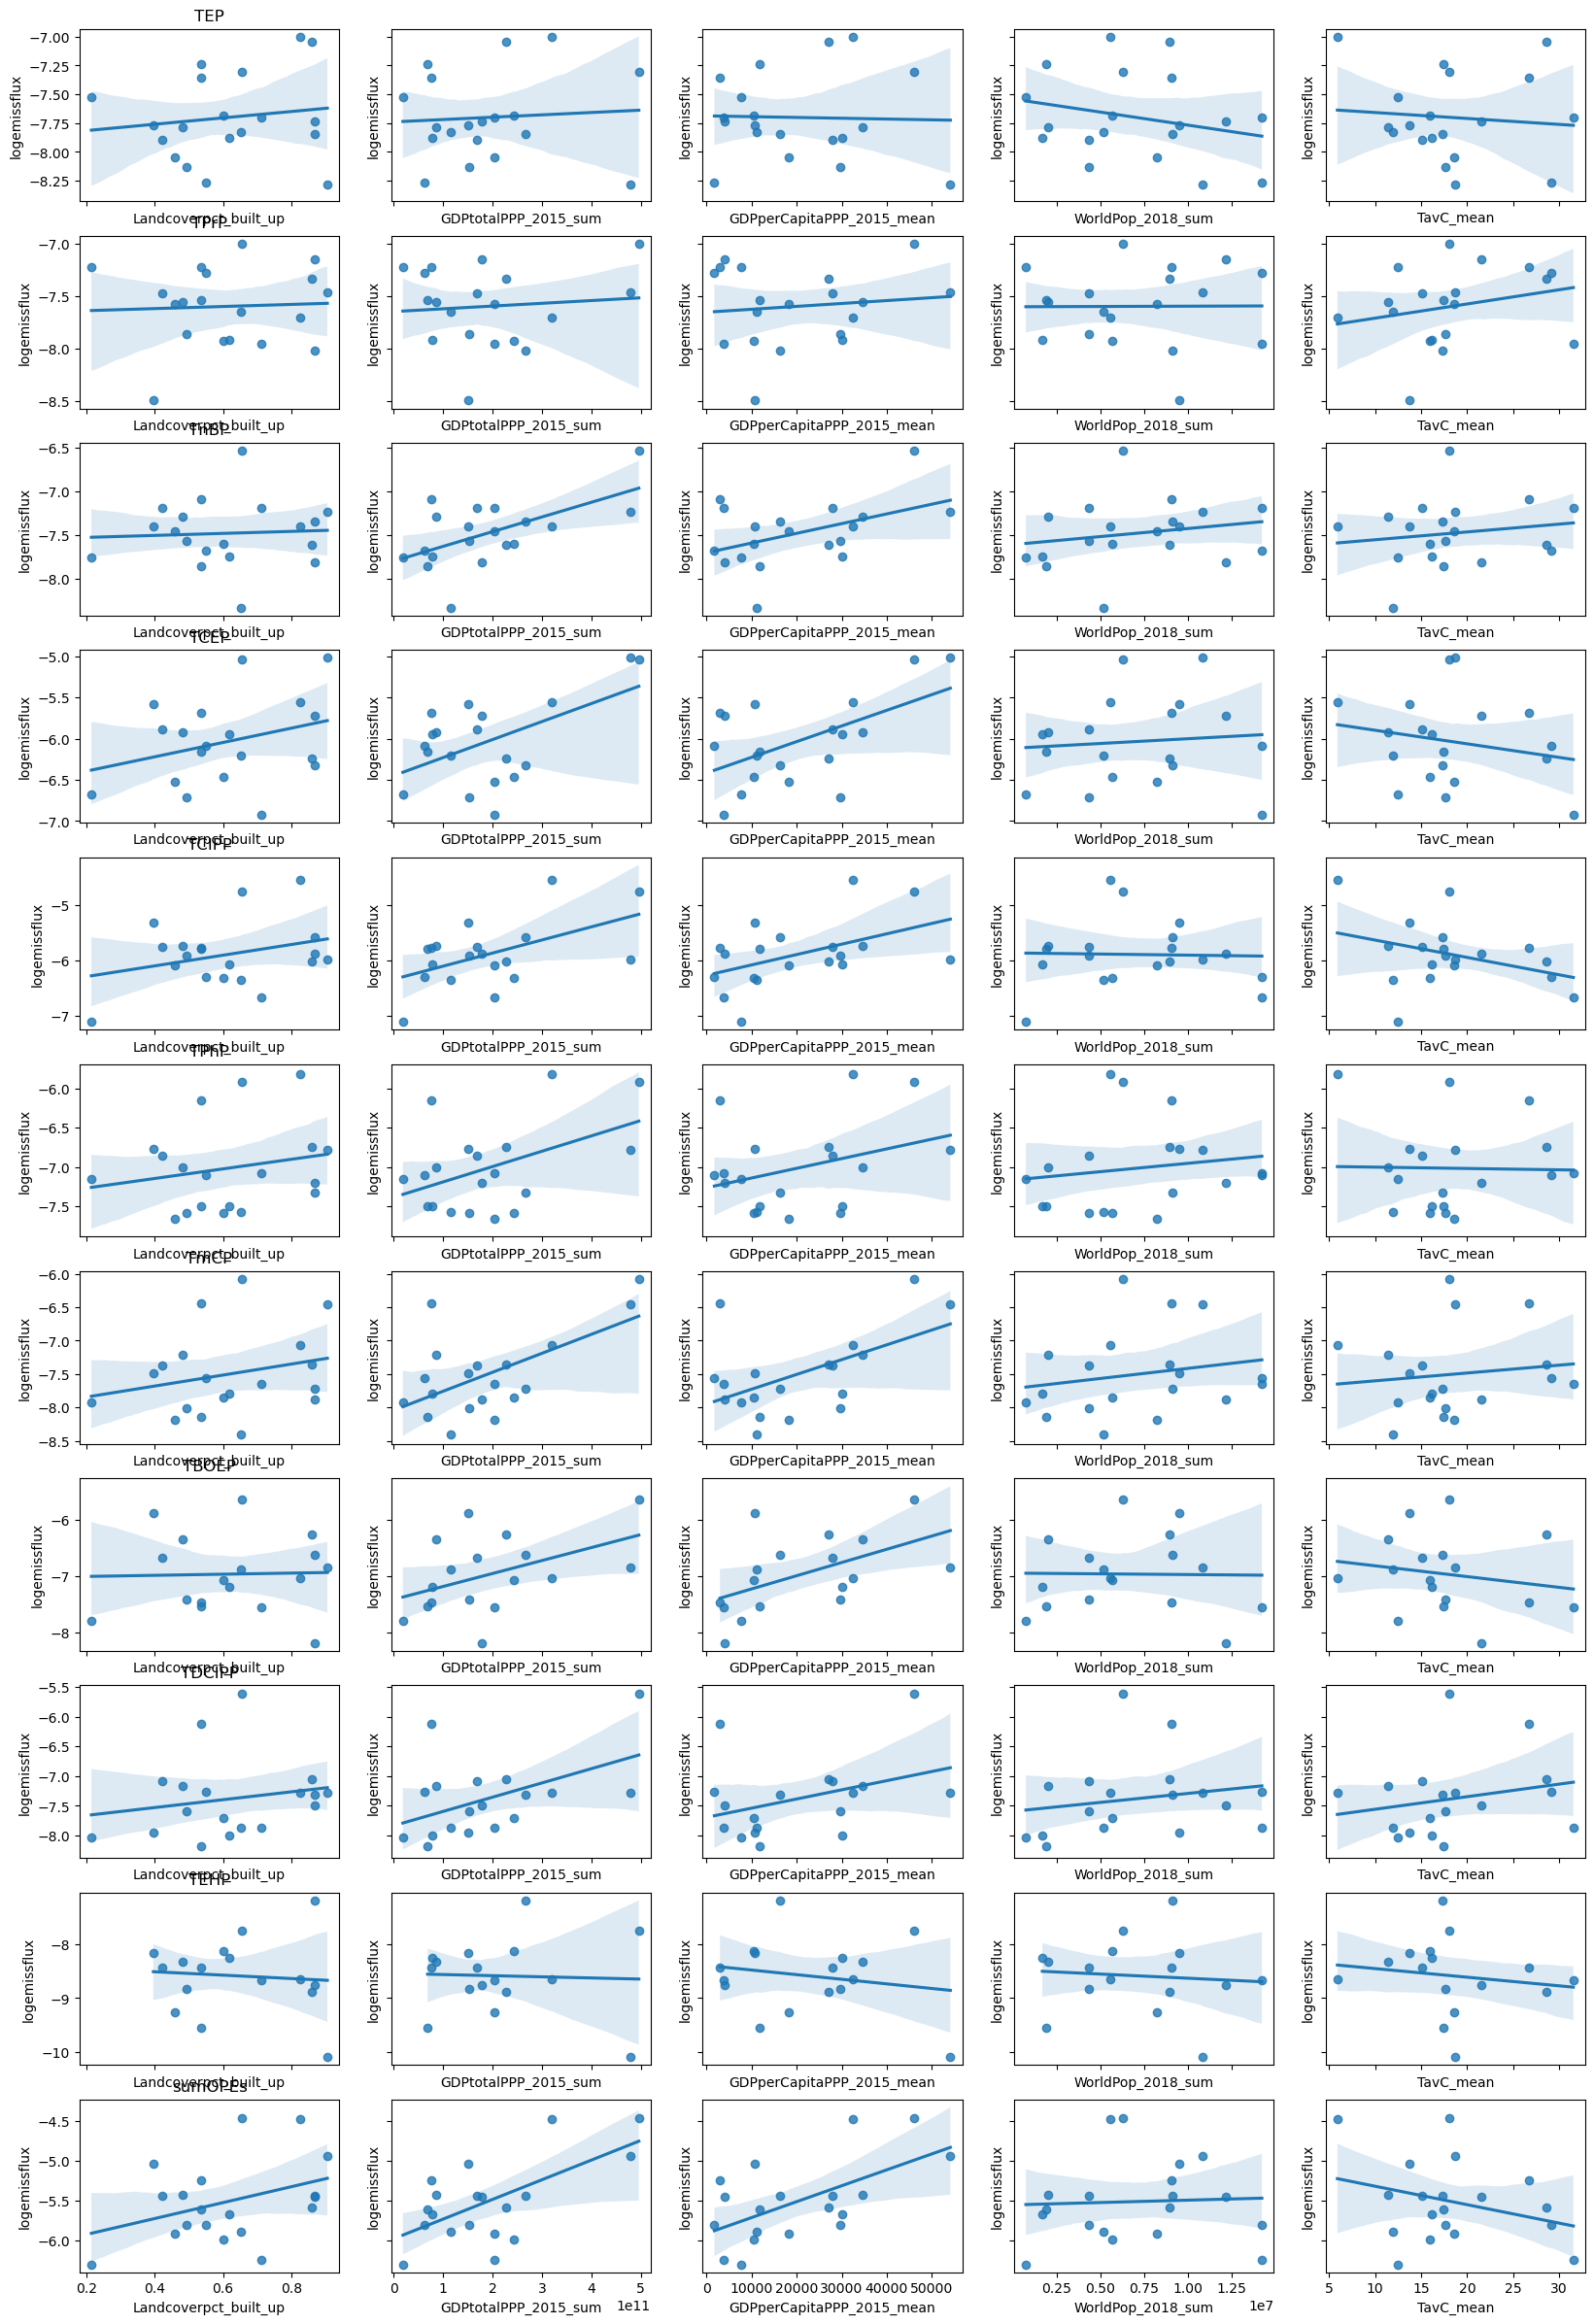

In [56]:
#Now, lets see what happens if we start look at plots between log emissflux and potential explanatory variables
#pdb.set_trace()
pltvars =['Landcoverpct_built_up','GDPtotalPPP_2015_sum','GDPperCapitaPPP_2015_mean',
           'WorldPop_2018_sum','TavC_mean']
#pltvars = varlist
fig,axs = plt.subplots(len(resdf.index.levels[1]),len(pltvars),figsize=(20,30),sharex = 'col',sharey='row')
#pltdata = resdf#resdf.loc[(slice(None),chem),[varlist + ['emiss_kgyr']]]
for row,chem in enumerate(resdf.index.levels[1]):
    for col,var in enumerate(pltvars):
        #pdb.set_trace()
        #sns.regplot(x=var,y='emiss_kgyr',data=resdf.loc[(slice(None),chem),:],ax = axs[row,col],robust=False)
        sns.regplot(x=var,y='logemissflux',data=resdf.loc[(slice(None),chem),:],ax = axs[row,col],robust=False)
        if col == 0:
            axs[row,col].set_title(chem)

In [64]:
from itertools import combinations

In [65]:
#Now lets look at the MLR for different c-c-c-combos (very slow)
pltvars = ['GDPtotalPPP_2015_sum',
           'EDGAR_TOTCO2_kgm2s',
           'EDGAR_CO2_Aviation_pct','EDGAR_CO2_Agriculture_pct','EDGAR_CO2_Chemical_processes_pct',
             'EDGAR_CO2_Power_industry_pct','EDGAR_CO2_Combustion_for_manufacturing_pct',
             'EDGAR_CO2_Iron_and_steel_production_pct','EDGAR_CO2_Non_energy_use_of_fuels_pct',
             'EDGAR_CO2_Non-ferrous_metals_production_pct','EDGAR_CO2_Non-metallic_minerals_production_pct',
             'EDGAR_CO2_Fuel_Exploitation_pct','EDGAR_CO2_Solvents_and_products_use_pct',
             'EDGAR_CO2_Energy_for_buildings_pct','EDGAR_CO2_Oil_refineries_and_Transformation_industry_pct',
             'EDGAR_CO2_Solid_waste_incineration_pct','EDGAR_CO2_Railways_pipelines_offroad_pct','EDGAR_CO2_Shipping_pct',
             'EDGAR_CO2_Road_transportation_pct']

numvals = len(resdf.index)
MLRs = {}
#pdb.set_trace()
#Add the constant to pltvars and the dataframe
regdf = sm.add_constant(resdf, prepend=False)
regdf.loc[:,'const'] = 1
#pltvars.append('const')
MLRres = pd.DataFrame(index = varlist,columns = ['slope','intercept','r2','RMSE','RMSEN','p(t)'])
regdf = regdf.drop(regdf.loc[np.isnan(regdf.logemissflux)].index)
modnum = 0
for row,chem in enumerate(resdf.index.levels[1]):
    for i in range(1,len(pltvars)):
        combi = (list(combinations(pltvars,i)))
        for ind,combo in enumerate(combi):
            #print(cols)
            regname = chem+'_MLR_' + str(i) +'_vars_'+str(ind+1)
            #pdb.set_trace()
            #coldf = regdf.copy()
            
            #MLRs[regname] = sm.OLS(regdf.loc[(slice(None),chem),['emissflux_kgm2y']],
            MLRs[regname] = sm.OLS(regdf.loc[(slice(None),chem),['logemissflux']],
                                   regdf.loc[(slice(None),chem),(*combo,'const')],hasconst = True).fit()
            #MLRs[regname] = sm.RLM(regdf.loc[(slice(None),chem),['emissflux_kgm2y']],
            #                       regdf.loc[(slice(None),chem),(*combo,'const')],hasconst = True).fit()
            #print(regname)
    #print(MLRs[regname].summary())

C:\Users\Timot\.conda\envs\562env\Lib\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\Timot\.conda\envs\562env\Lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


KeyboardInterrupt: 

In [ ]:
MLRouts = pd.DataFrame(index = MLRs.keys(),columns = ['m1','b','p_m1','p_b','AIC'])
for reg in MLRs:
    #pdb.set_trace()
    MLRouts.loc[reg,'m1'] = MLRs[reg].params[0]*1e8
    MLRouts.loc[reg,'b'] = MLRs[reg].params[1]
    MLRouts.loc[reg,'p_m1'] = MLRs[reg].pvalues[0]
    MLRouts.loc[reg,'p_b'] = MLRs[reg].pvalues[1]
    MLRouts.loc[reg,'r²'] = MLRs[reg].rsquared
    MLRouts.loc[reg,'adjr²'] = MLRs[reg].rsquared_adj
    MLRouts.loc[reg,'p_reg'] = MLRs[reg].f_pvalue
    MLRouts.loc[reg,'AIC'] = MLRs[reg].aic
MLRouts.loc[:,'chem'] = MLRouts.index
MLRouts['chem'] = MLRouts.apply(lambda x: x['chem'][0:x['chem'].find('_')],axis=1)
#MLRouts.loc[(MLRouts.p_m1<0.05) & (MLRouts.p_reg<0.05),:]
MLRouts.sort_values('AIC')
#MLRouts.sort_values('r²')

In [ ]:
top5= {}
bestperchem = pd.DataFrame(index = MLRouts['chem'].unique(),columns = MLRouts.columns)
bestperchem.loc[:,'reg'] = 0
for chem in MLRouts['chem'].unique():
    #top5[chem] = MLRouts.loc[MLRouts.chem==chem,:].sort_values('p_m1')[:5]
    top5[chem] = MLRouts.loc[MLRouts.chem==chem,:].sort_values('AIC')[:5]
    #top5[chem] = MLRouts.loc[MLRouts.chem==chem,:].sort_values('adjr²',ascending=False)[:5]
    #pdb.set_trace()
    bestperchem.loc[chem,:] = top5[chem].iloc[0]
    bestperchem.loc[chem,'reg'] = top5[chem].index[0]
    
bestperchem

# Lecture 13 - Nonlinear Regression

In [99]:
#Import lecture 8 data - 6PPD-quinone stability analysis
stadf = pd.read_excel('Data/lec8_hypothesis_data.xlsx',sheet_name=1)
#Data Clean-up:
stadf.loc[stadf.Concentration_ng_l=="<LOQ",'Concentration_ng_l'] = 0.0
stadf.head()

Sample  Time_h Concentration_ng_l
0  SPK_0-1     0.0              51.71
1  SPK_0-2     0.0              68.43
2  SPK_0-3     0.0                 63
3  SPK_0-4     0.0                 60
4  SPK_4-1     4.0              60.71

In [100]:
#First, we will define the function we are fitting. Exponential decay with asymptote
#y = yf+(yo-yf)exp(-log(alpha)*t))
def decayfunc(t,yf,yo,logalpha):#la = log alpha, we will just fit logged
    y = yf+(yo-yf)*np.exp(-logalpha*t)
    return y

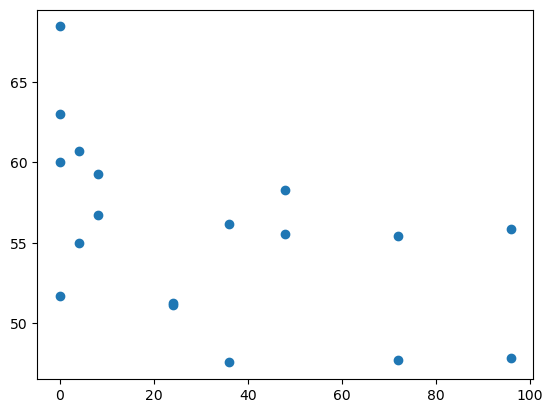

In [101]:
#Define our terms
pltdata = stadf[~stadf.Time_h.isna()]
y = pltdata.loc[:,'Concentration_ng_l']
t = pltdata.loc[:,'Time_h']
plt.plot(t,y,'o')
#plt.set_ylim(0,70)

In [113]:
#from uncertainties import ufloat

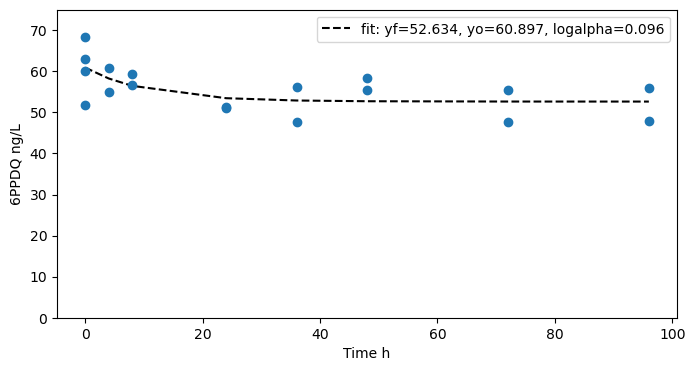

In [111]:
#Fit the curve
params,pcov = curve_fit(decayfunc, t, y)
perr = np.sqrt(np.diag(pcov))
df_e = len(pltdata.loc[:,'Concentration_ng_l'])-len(params)
confidence = 0.95
#Calculate the confidence interval for each parameter
ci = perr * scipy.stats.t.ppf((1 + confidence) / 2., df_e)
#print(params)
#plot it
fig,ax = plt.subplots(1,figsize=(8,4))
ax.plot(t, decayfunc(t, *params), 'k--',
         label='fit: yf=%5.3f, yo=%5.3f, logalpha=%5.3f' % tuple(params) );
ax.plot(t,y,'o')
ax.set_ylim(0,75);
ax.set_xlabel('Time h');
ax.set_ylabel('6PPDQ ng/L')
ax.legend()
#ax.show()

In [86]:
#Now for all of you - how can we tell if these results are "significant"? See the below link:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html 


3

In [109]:
import scipy.stats
perr = np.sqrt(np.diag(pcov))
df_e = len(pltdata.loc[:,'Concentration_ng_l'])-len(params)
confidence = 0.95
#Calculate the confidence interval for each parameter
ci = perr * scipy.stats.t.ppf((1 + confidence) / 2., df_e)

#

In [115]:
for ind,param in enumerate(['yo', 'yf', 'logalpha']):
    print(param+' ',params[ind],params[ind]-ci[ind],params[ind]+ci[ind])

yo  52.63394427275228 48.89449203869714 56.373396506807424
yf  60.89658913400437 56.10486335897834 65.68831490903041
logalpha  0.09616550130928392 -0.11530367664378832 0.30763467926235616
